In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [ ]:
!wget https://github.com/noorkhokhar99/Digit-Recognition/archive/refs/heads/master.zip -O digit-recognizer

--2024-05-09 14:50:41--  https://github.com/noorkhokhar99/Digit-Recognition/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/noorkhokhar99/Digit-Recognition/zip/refs/heads/master [following]
--2024-05-09 14:50:41--  https://codeload.github.com/noorkhokhar99/Digit-Recognition/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘digit-recognizer’

digit-recognizer        [ <=>                ]  22.34M  --.-KB/s    in 0.1s    

2024-05-09 14:50:42 (207 MB/s) - ‘digit-recognizer’ saved [23422257]



In [ ]:
!unzip /content/digit-recognizer.zip

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
X = train_data.drop(columns=['label']).values.astype('float32') / 255.0
X_test = test_data.values.astype('float32') / 255.0
y = train_data['label'].values.astype('int')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pca = PCA(n_components=100, random_state=42)  # Уменьшаем размерность до 100 компонент
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(100,)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_pca, y_train, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
237/237 [==============================] - 6s 19ms/step - loss: 0.8134 - accuracy: 0.7347 - val_loss: 0.2216 - val_accuracy: 0.9351
Epoch 2/20
237/237 [==============================] - 3s 13ms/step - loss: 0.3423 - accuracy: 0.8975 - val_loss: 0.1669 - val_accuracy: 0.9503
Epoch 3/20
237/237 [==============================] - 3s 11ms/step - loss: 0.2585 - accuracy: 0.9234 - val_loss: 0.1315 - val_accuracy: 0.9598
Epoch 4/20
237/237 [==============================] - 2s 10ms/step - loss: 0.2143 - accuracy: 0.9386 - val_loss: 0.1141 - val_accuracy: 0.9676
Epoch 5/20
237/237 [==============================] - 2s 10ms/step - loss: 0.1854 - accuracy: 0.9459 - val_loss: 0.1006 - val_accuracy: 0.9690
Epoch 6/20
237/237 [==============================] - 4s 16ms/step - loss: 0.1645 - accuracy: 0.9527 - val_loss: 0.0962 - val_accuracy: 0.9714
Epoch 7/20
237/237 [==============================] - 3s 13ms/step - loss: 0.1464 - accuracy: 0.9579 - val_loss: 0.0912 - val_accuracy: 0.9744

In [ ]:
loss, accuracy = model.evaluate(X_test_pca, y_test)
print("Accuracy on test set:", accuracy)

263/263 [==============================] - 3s 11ms/step - loss: 0.0825 - accuracy: 0.9769
Accuracy on test set: 0.9769047498703003


In [ ]:
submission_df = pd.read_csv('sample_submission.csv')

In [ ]:
X_test_data_pca = pca.transform(X_test)

In [ ]:
predicted_probabilities = model.predict(X_test_data_pca)

predicted_labels = predicted_probabilities.argmax(axis=1)

875/875 [==============================] - 4s 4ms/step


In [ ]:
submission_df = pd.DataFrame({'ImageId': range(1, len(predicted_labels) + 1),
                              'Label': predicted_labels})

In [ ]:
submission_df.to_csv('sample_submission_otput.csv', index=False)

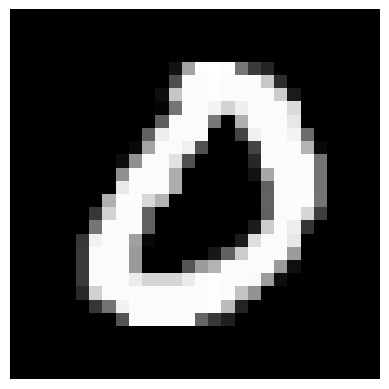

In [ ]:
index = 7

image = test_data.iloc[index-1].values.reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Your submission scored 0.97667